# pip install pandas numpy matplotlib seaborn scikit-learn jupyter

1. Then visualize the data (Life Ladder, Log GDP per capita, Freedom to make life choices) - Maybe a line plot
2. Choose an algorithm to train our model using Gridsearch
3. Separate a few years for a prediction 
4. Train the model and validate it (what our validation technique is??)
5. ⁠Create a confusion matrix or a r2 score (Based on our algorithm)

In [3]:
# **DATASET PRE-PROCESSING**
import os
import numpy as np
import pandas as pd

In [4]:
# changed sessions selection from 2005 - 2023 to link with the happiness dataset.
sessions = np.arange(60, 79)
data=[]

for session in sessions:
    directory = "../data/TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
     
        #if filename.index("_") == 1: continue
        #print(filename)
        with open(os.path.join(directory, filename), encoding='utf-8') as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
3660,78,2023,WSM,Samoa extends its congratulations and best wis...
3661,78,2023,YEM,This session of the General Assembly is being ...
3662,78,2023,ZAF,Seventy-eight years ago. in the aftermath of t...
3663,78,2023,ZMB,The world today is overcome with the overlappi...
3664,78,2023,ZWE,I wish to congratulate Mr. Dennis Francis on h...


In [5]:
df_speech.shape
# 4 columns with 3664 rows

df_speech.info()
# from the 'Non-Null Count' column it's seems like we have no missing data

missing_data = df_speech.isnull()
print(missing_data)

missing_sum = missing_data.sum()
print(missing_sum)
# no missing values to be dealt with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Session          3665 non-null   int32 
 1   Year             3665 non-null   int32 
 2   ISO-alpha3 Code  3665 non-null   object
 3   Speech           3665 non-null   object
dtypes: int32(2), object(2)
memory usage: 86.0+ KB
      Session   Year  ISO-alpha3 Code  Speech
0       False  False            False   False
1       False  False            False   False
2       False  False            False   False
3       False  False            False   False
4       False  False            False   False
...       ...    ...              ...     ...
3660    False  False            False   False
3661    False  False            False   False
3662    False  False            False   False
3663    False  False            False   False
3664    False  False            False   False

[3665 rows x 4 colum

In [6]:
df_codes = pd.read_csv('../data/UNSD — Methodology.csv', delimiter=';')
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [7]:
# merge the two dataframes on 'ISO-alpha3 Code'
merged_df = pd.merge(df_codes, df_speech, on="ISO-alpha3 Code")
merged_df = merged_df[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code", "Session", "Year", "Speech"]]

# Set the index to a multindex
merged_df = merged_df.set_index(['Country or Area','Year'])

# Rename the index columns
merged_df = merged_df.rename_axis(['Country name', 'year'])


merged_df.head()

Region Name  Sub-region Name ISO-alpha3 Code  Session  \
Country name year                                                         
Algeria      2005      Africa  Northern Africa             DZA       60   
             2006      Africa  Northern Africa             DZA       61   
             2007      Africa  Northern Africa             DZA       62   
             2008      Africa  Northern Africa             DZA       63   
             2009      Africa  Northern Africa             DZA       64   

                                                              Speech  
Country name year                                                     
Algeria      2005  At\nthis crucial moment, when it is debating q...  
             2006  At a \ntime when the United Nations continues ...  
             2007  I have  the particular pleasure of conveying t...  
             2008  I wish \nat the outset to congratulate Mr. Mig...  
             2009  Allow \nme first to express the pleasure of th...

In [8]:
happinessdataframe = pd.read_excel('../data/DataForTable2.1.xls', index_col=[0,1]) 

print(happinessdataframe.shape)
# 9 columns with 2363 rows

happinessdataframe.info()
# from the 'Non-Null Count' column it's seems like Life ladder is the only column with no missing values

missing_data = happinessdataframe.isnull()
missing_sum = missing_data.sum()
print(missing_sum)
# There are some missing values in this dataset

happinessdataframe.head()

(2363, 9)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2363 entries, ('Afghanistan', 2008) to ('Zimbabwe', 2023)
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       2363 non-null   float64
 1   Log GDP per capita                2335 non-null   float64
 2   Social support                    2350 non-null   float64
 3   Healthy life expectancy at birth  2300 non-null   float64
 4   Freedom to make life choices      2327 non-null   float64
 5   Generosity                        2282 non-null   float64
 6   Perceptions of corruption         2238 non-null   float64
 7   Positive affect                   2339 non-null   float64
 8   Negative affect                   2347 non-null   float64
dtypes: float64(9)
memory usage: 179.2+ KB
Life Ladder                           0
Log GDP per capita                   28
Social support                    

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.350416        0.450662   
             2009     4.401778            7.508646        0.552308   
             2010     4.758381            7.613900        0.539075   
             2011     3.831719            7.581259        0.521104   
             2012     3.782938            7.660506        0.520637   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.500000   
             2009                         50.799999   
             2010                         51.099998   
             2011                         51.400002   
             2012                         51.700001   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.164055   
             2009                      0.678896    0.187297   
             2010                      0.600127    0.117861   
             2011                      0.495901    0.160098   
             2012                      0.530935    0.234157   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.414297         0.258195  
             2009                   0.850035         0.481421         0.237092  
             2010                   0.706766         0.516907         0.275324  
             2011                   0.731109         0.479835         0.267175  
             2012                   0.775620         0.613513         0.267919

In [9]:
# My goal is to iterate through each country in this dataframe and replace any missing values with the mean of that column
# for that particular country

# This shows the mean data for each column for the country of Afghanistan
happinessdataframe.loc["Afghanistan"].mean()

Life Ladder                          3.219917
Log GDP per capita                   7.585624
Social support                       0.476654
Healthy life expectancy at birth    52.711667
Freedom to make life choices         0.480475
Generosity                           0.056325
Perceptions of corruption            0.835824
Positive affect                      0.421804
Negative affect                      0.370840
dtype: float64

In [10]:
# This line of code fills any missing value in a column with the mean value for that particular country
happinessdataframe.loc["Afghanistan"].fillna(happinessdataframe.loc["Afghanistan"].mean())

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332


In [11]:
# Group by the first level of the MultiIndex (Country name)
# apply(lambda group: group.fillna(group.mean())): For each group (which corresponds to each country), 
# it applies a function that fills the NaN values with the column-wise mean for that specific group.
happinessdataframe = happinessdataframe.groupby(level=0, group_keys=False).apply(lambda group: group.fillna(group.mean()))
happinessdataframe.info()

missing_data = happinessdataframe.isnull()
missing_sum = missing_data.sum()
print(missing_sum)
# We haven't filled in all of the missing data and this is because some countries like China
# Do not have any data for their column 'Perception of corruption' which means we can't calculate a mean for that group.
# This is fine for now but if it needs to be changed we can come back later.

# exported the new dataframe so I could have a look at the full set in excel
#happinessdataframe.to_excel("output.xlsx")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2363 entries, ('Afghanistan', 2008) to ('Zimbabwe', 2023)
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       2363 non-null   float64
 1   Log GDP per capita                2354 non-null   float64
 2   Social support                    2362 non-null   float64
 3   Healthy life expectancy at birth  2313 non-null   float64
 4   Freedom to make life choices      2363 non-null   float64
 5   Generosity                        2354 non-null   float64
 6   Perceptions of corruption         2333 non-null   float64
 7   Positive affect                   2361 non-null   float64
 8   Negative affect                   2362 non-null   float64
dtypes: float64(9)
memory usage: 179.2+ KB
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy

In [12]:
# Perform the merge based on Country and Year from both dataframes
final_df = pd.merge(merged_df, happinessdataframe, on=["Country name","year"], suffixes=('_left', '_right'))

# exported the file just so I could double check everything has merged properly
# which it looks like it has
#final_df.to_excel("output.xlsx")

In [13]:
# Now if we take a look at the new dataframe
# TODO -> Future work, see which countries where dropped.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2038 entries, ('Algeria', 2010) to ('New Zealand', 2023)
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region Name                       2038 non-null   object 
 1   Sub-region Name                   2038 non-null   object 
 2   ISO-alpha3 Code                   2038 non-null   object 
 3   Session                           2038 non-null   int32  
 4   Speech                            2038 non-null   object 
 5   Life Ladder                       2038 non-null   float64
 6   Log GDP per capita                2033 non-null   float64
 7   Social support                    2037 non-null   float64
 8   Healthy life expectancy at birth  2022 non-null   float64
 9   Freedom to make life choices      2038 non-null   float64
 10  Generosity                        2033 non-null   float64
 11  Perceptions of corruption         20

In [14]:
final_df.head()

Region Name  Sub-region Name ISO-alpha3 Code  Session  \
Country name year                                                         
Algeria      2010      Africa  Northern Africa             DZA       65   
             2011      Africa  Northern Africa             DZA       66   
             2012      Africa  Northern Africa             DZA       67   
             2014      Africa  Northern Africa             DZA       69   
             2016      Africa  Northern Africa             DZA       71   

                                                              Speech  \
Country name year                                                      
Algeria      2010  First of \nall, I would like to congratulate y...   
             2011  His \nExcellency Mr. Abdelaziz Bouteflika, Pre...   
             2012  ﻿I would\nlike to take this opportunity to war...   
             2014  I should like at the outset to express my sati...   
             2016  I am honoured and privileged to address the As...   

                   Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Algeria      2010     5.463567            9.306355        0.811683   
             2011     5.317194            9.315958        0.810234   
             2012     5.604596            9.329962        0.839397   
             2014     6.354898            9.355415        0.818189   
             2016     5.340854            9.383312        0.748588   

                   Healthy life expectancy at birth  \
Country name year                                     
Algeria      2010                         65.500000   
             2011                         65.599998   
             2012                         65.699997   
             2014                         65.900002   
             2016                         66.099998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Algeria      2010                      0.592696   -0.212297   
             2011                      0.529561   -0.187624   
             2012                      0.586663   -0.179103   
             2014                      0.520711   -0.132543   
             2016                      0.520711   -0.132543   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Algeria      2010                   0.618038         0.540448         0.266245  
             2011                   0.637982         0.502736         0.254897  
             2012                   0.690116         0.540059         0.229716  
             2014                   0.688052         0.558359         0.176866  
             2016                   0.688052         0.565026         0.377112

In [15]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
target_words = ["gender", "women", "woman", "girl", "girls", "female", "non-binary", "sexes", "equality", "feminist", "feminists", 
                       "females", "womans", "queer", "trans", "transgender", "lgbtq", "equity", "binary"]

In [17]:
from nltk import word_tokenize
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w.lower() not in sw) & (w.isalpha()):
            no_sw.append(w.lower())
    return no_sw

# This function takes in the words of a speech and compares it with our target words
def count_unique_matches(words, target_words):
    target_set = set(target_words) # Convert to set for faster look ups
    matched_words = [w for w in words if w in target_set] # This collects what target words are present in the speech 
    return len(matched_words)  # return the frequency of the matched words in the speech

frequency = []
for index, row in final_df.iterrows():
    words = word_tokenize(row["Speech"])
    words = preprocess(words)  
    frequency.append(count_unique_matches(words, target_words))

# Verify the result
final_df['Frequency'] = frequency

final_df.head()

Region Name  Sub-region Name ISO-alpha3 Code  Session  \
Country name year                                                         
Algeria      2010      Africa  Northern Africa             DZA       65   
             2011      Africa  Northern Africa             DZA       66   
             2012      Africa  Northern Africa             DZA       67   
             2014      Africa  Northern Africa             DZA       69   
             2016      Africa  Northern Africa             DZA       71   

                                                              Speech  \
Country name year                                                      
Algeria      2010  First of \nall, I would like to congratulate y...   
             2011  His \nExcellency Mr. Abdelaziz Bouteflika, Pre...   
             2012  ﻿I would\nlike to take this opportunity to war...   
             2014  I should like at the outset to express my sati...   
             2016  I am honoured and privileged to address the As...   

                   Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Algeria      2010     5.463567            9.306355        0.811683   
             2011     5.317194            9.315958        0.810234   
             2012     5.604596            9.329962        0.839397   
             2014     6.354898            9.355415        0.818189   
             2016     5.340854            9.383312        0.748588   

                   Healthy life expectancy at birth  \
Country name year                                     
Algeria      2010                         65.500000   
             2011                         65.599998   
             2012                         65.699997   
             2014                         65.900002   
             2016                         66.099998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Algeria      2010                      0.592696   -0.212297   
             2011                      0.529561   -0.187624   
             2012                      0.586663   -0.179103   
             2014                      0.520711   -0.132543   
             2016                      0.520711   -0.132543   

                   Perceptions of corruption  Positive affect  \
Country name year                                               
Algeria      2010                   0.618038         0.540448   
             2011                   0.637982         0.502736   
             2012                   0.690116         0.540059   
             2014                   0.688052         0.558359   
             2016                   0.688052         0.565026   

                   Negative affect  Frequency  
Country name year                              
Algeria      2010         0.266245          0  
             2011         0.254897          1  
             2012         0.229716          3  
             2014         0.176866          4  
             2016         0.377112          2

In [18]:
# Group by country and calculate the year-over-year difference in the 'Frequency' column
final_df['Frequency Difference'] = final_df.groupby('Country name')['Frequency'].diff()

# Fill NaN values with 0 (since the first year for each country won't have a difference)
final_df['Frequency Difference'] = final_df['Frequency Difference'].fillna(0)

final_df['Trend'] = np.where(final_df['Frequency Difference'] > 0, 1, 0)

final_df.head()

Region Name  Sub-region Name ISO-alpha3 Code  Session  \
Country name year                                                         
Algeria      2010      Africa  Northern Africa             DZA       65   
             2011      Africa  Northern Africa             DZA       66   
             2012      Africa  Northern Africa             DZA       67   
             2014      Africa  Northern Africa             DZA       69   
             2016      Africa  Northern Africa             DZA       71   

                                                              Speech  \
Country name year                                                      
Algeria      2010  First of \nall, I would like to congratulate y...   
             2011  His \nExcellency Mr. Abdelaziz Bouteflika, Pre...   
             2012  ﻿I would\nlike to take this opportunity to war...   
             2014  I should like at the outset to express my sati...   
             2016  I am honoured and privileged to address the As...   

                   Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Algeria      2010     5.463567            9.306355        0.811683   
             2011     5.317194            9.315958        0.810234   
             2012     5.604596            9.329962        0.839397   
             2014     6.354898            9.355415        0.818189   
             2016     5.340854            9.383312        0.748588   

                   Healthy life expectancy at birth  \
Country name year                                     
Algeria      2010                         65.500000   
             2011                         65.599998   
             2012                         65.699997   
             2014                         65.900002   
             2016                         66.099998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Algeria      2010                      0.592696   -0.212297   
             2011                      0.529561   -0.187624   
             2012                      0.586663   -0.179103   
             2014                      0.520711   -0.132543   
             2016                      0.520711   -0.132543   

                   Perceptions of corruption  Positive affect  \
Country name year                                               
Algeria      2010                   0.618038         0.540448   
             2011                   0.637982         0.502736   
             2012                   0.690116         0.540059   
             2014                   0.688052         0.558359   
             2016                   0.688052         0.565026   

                   Negative affect  Frequency  Frequency Difference  Trend  
Country name year                                                           
Algeria      2010         0.266245          0                   0.0      0  
             2011         0.254897          1                   1.0      1  
             2012         0.229716          3                   2.0      1  
             2014         0.176866          4                   1.0      1  
             2016         0.377112          2                  -2.0      0

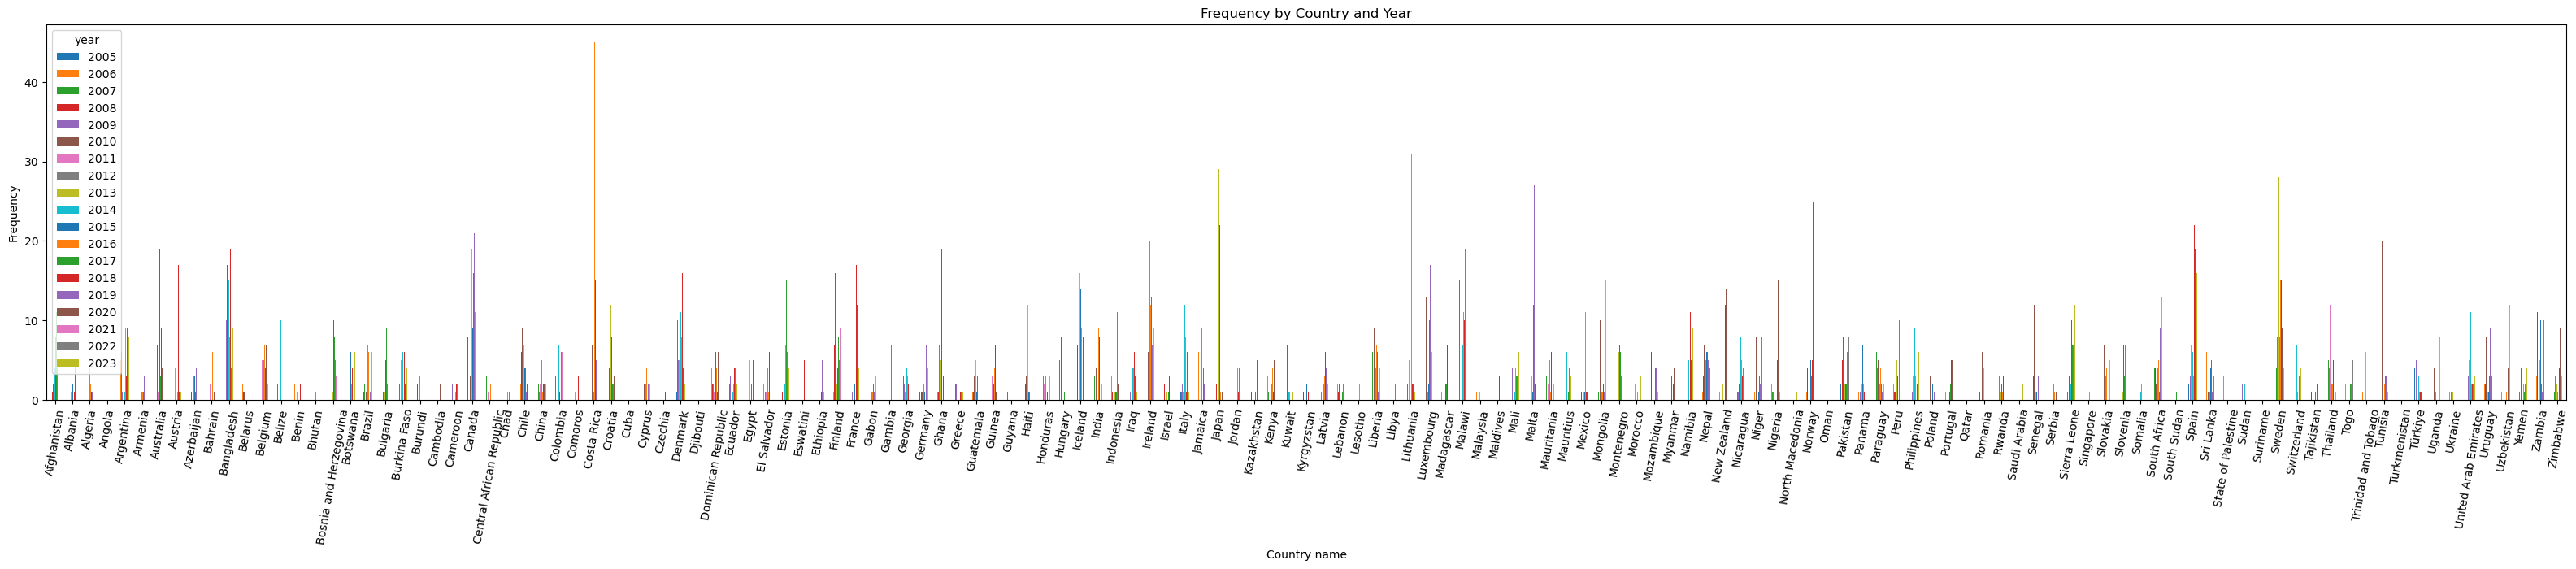

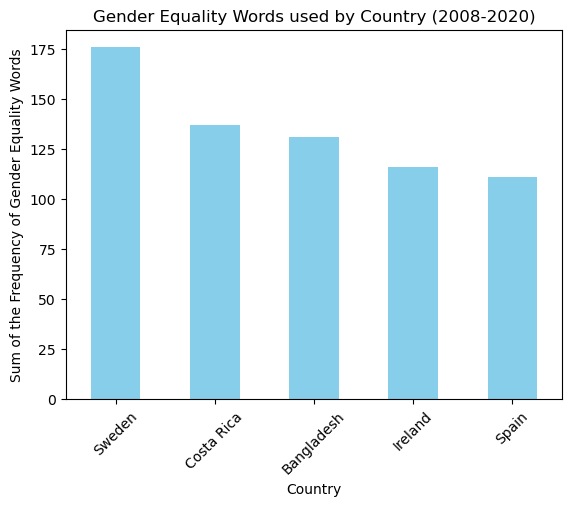

<Figure size 640x480 with 0 Axes>

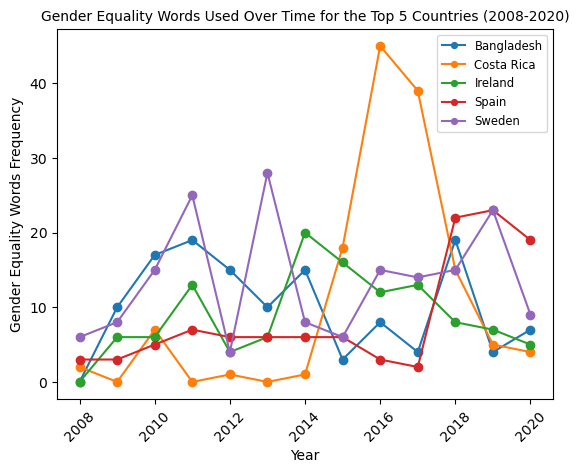

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the words to visually see if each year has a pattern
import matplotlib.pyplot as plt

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array
reset_index = final_df.reset_index()

reset_index.groupby(['Country name', 'year'])['Frequency'].sum().unstack().plot(kind='bar', figsize=(40, 6))

plt.title('Frequency by Country and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()
plt.savefig('freq_coutry_year.png')

# Let's look at the top countries over a year range that use those words
# define the range
start_year = 2008
end_year = 2020
# Filter the DataFrame for the specific range of years using the 'Year' column
df_range = reset_index[reset_index['year'].between(start_year, end_year)]
# Sum the word frequencies for all words to get total word frequency per country
df_country_word1 = df_range.groupby('Country name')['Frequency'].sum()
df_top5 = df_country_word1.sort_values(ascending=False).head(5)
df_top5.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title(f'Gender Equality Words used by Country ({start_year}-{end_year})')
plt.xlabel('Country')
plt.ylabel('Sum of the Frequency of Gender Equality Words')
plt.xticks(rotation=45)
plt.show()
plt.savefig('top5_sum.png')

# Another option here is to plot the freq of words used over that year range
# Filter the original DataFrame to only include rows for the top 5 countries
top_countries = df_country_word1.sort_values(ascending=False).head(5).index
df_top_countries = df_range[df_range['Country name'].isin(top_countries)]

# Group by both 'Country' and 'Year', summing the word frequency
df_grouped = df_top_countries.groupby(['Country name', 'year']).agg({'Frequency': 'sum'}).reset_index()

# Pivot the data for easier plotting (Country vs. Year for words frequency)
df_pivot = df_grouped.pivot(index='year', columns='Country name', values='Frequency')

# Step 8: Plot the frequencies of words over time for the top 5 countries
df_pivot.plot(kind='line', marker='o')

# Add labels and title
plt.title(f'Gender Equality Words Used Over Time for the Top 5 Countries ({start_year}-{end_year})', fontsize=10)
plt.legend(fontsize='small', markerscale=0.7)
plt.xlabel('Year')
plt.ylabel('Gender Equality Words Frequency')
plt.xticks(rotation=45)
plt.show()
plt.savefig('top5_peryear.png')

In [20]:
# **FEATURE EXTRACTION/FEATURE ENGINEERING**
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

model_df = final_df.reset_index()
# set my train and test data
train_data = model_df[(model_df['year'] >= 2010) & (model_df['year'] <= 2020)].dropna()
test_data = model_df[(model_df['year'] == 2023)].dropna()

# lets drop columns so both data frames are easier to read
train_data = train_data.drop(['Region Name', 'Sub-region Name', 'ISO-alpha3 Code', 'Session', 'Speech', 
                 'Healthy life expectancy at birth', 'Generosity', 'Positive affect', 
                 'Negative affect', 'Frequency Difference'],axis = 1)

test_data = test_data.drop(['Region Name', 'Sub-region Name', 'ISO-alpha3 Code', 'Session', 'Speech', 
                 'Healthy life expectancy at birth', 'Generosity', 'Positive affect', 
                 'Negative affect', 'Frequency Difference'],axis = 1)

train_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Frequency,Trend
0,Algeria,2010,5.463567,9.306355,0.811683,0.592696,0.618038,0,0
1,Algeria,2011,5.317194,9.315958,0.810234,0.529561,0.637982,1,1
2,Algeria,2012,5.604596,9.329962,0.839397,0.586663,0.690116,3,1
3,Algeria,2014,6.354898,9.355415,0.818189,0.520711,0.688052,4,1
4,Algeria,2016,5.340854,9.383312,0.748588,0.520711,0.688052,2,0
...,...,...,...,...,...,...,...,...,...
2030,New Zealand,2016,7.225688,10.636538,0.936603,0.926576,0.278271,0,0
2031,New Zealand,2017,7.327183,10.650288,0.954921,0.942279,0.221887,0,0
2032,New Zealand,2018,7.370286,10.667020,0.953863,0.949300,0.206580,12,1
2033,New Zealand,2019,7.205174,10.675274,0.938821,0.912042,0.233831,2,0


In [21]:
# we need to transform the columns Life ladder, Log GDP per capita and freq to a 0-1 scale
# creat an instance of MinMaxScaler
scaler = MinMaxScaler()

# select the cloumns you want to scale
columns_to_scale = ['Life Ladder', 'Log GDP per capita', 'Frequency', 'Log GDP per capita']

# fit and transform the selected columns, and assign them back to the data frame
train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

train_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Frequency,Trend
0,Algeria,2010,0.560089,0.533785,0.811683,0.592696,0.618038,0.000000,0
1,Algeria,2011,0.533545,0.535684,0.810234,0.529561,0.637982,0.022222,1
2,Algeria,2012,0.585664,0.538453,0.839397,0.586663,0.690116,0.066667,1
3,Algeria,2014,0.721730,0.543487,0.818189,0.520711,0.688052,0.088889,1
4,Algeria,2016,0.537835,0.549004,0.748588,0.520711,0.688052,0.044444,0
...,...,...,...,...,...,...,...,...,...
2030,New Zealand,2016,0.879646,0.796847,0.936603,0.926576,0.278271,0.000000,0
2031,New Zealand,2017,0.898052,0.799566,0.954921,0.942279,0.221887,0.000000,0
2032,New Zealand,2018,0.905869,0.802875,0.953863,0.949300,0.206580,0.266667,1
2033,New Zealand,2019,0.875926,0.804508,0.938821,0.912042,0.233831,0.044444,0


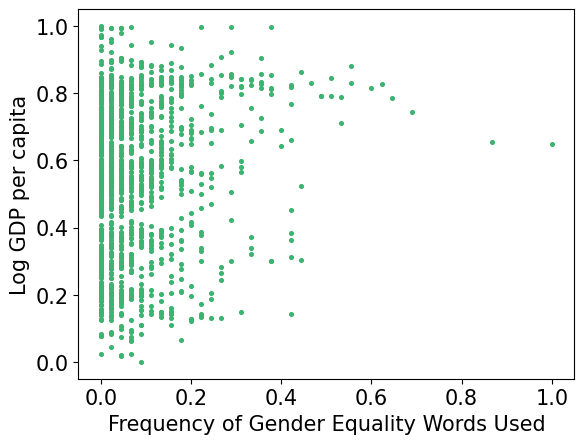

In [78]:
train_data.plot.scatter(x="Frequency", y="Log GDP per capita", s=7, c='mediumseagreen', marker='o')
# Adding title and labels
plt.xlabel('Frequency of Gender Equality Words Used', fontsize=15)
plt.ylabel('Log GDP per capita', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.savefig('freq_gdp.png')

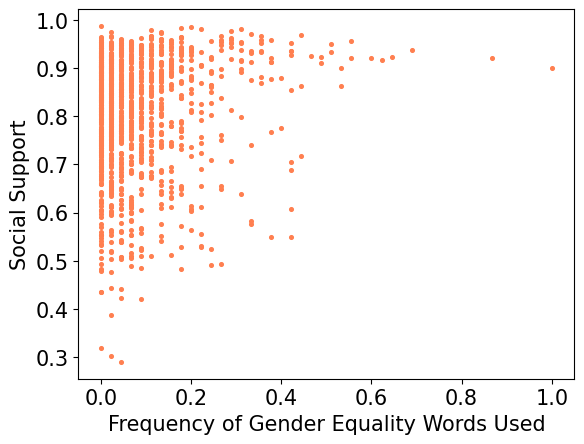

In [80]:
train_data.plot.scatter(x="Frequency", y="Social support", s=7, c='coral', marker='o')
# Adding title and labels
plt.xlabel('Frequency of Gender Equality Words Used', fontsize=15)
plt.ylabel('Social Support', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.savefig('freq_socialsupport.png')

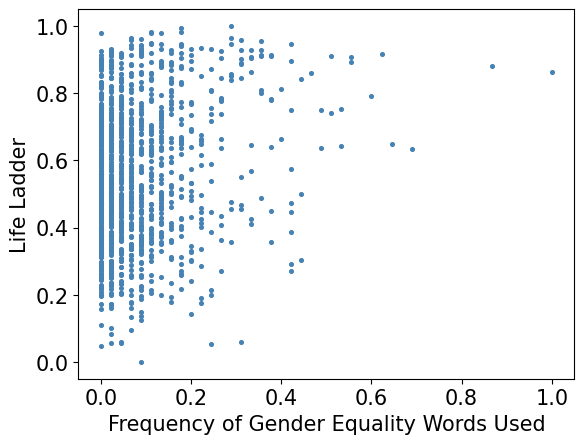

In [82]:
train_data.plot.scatter(x="Frequency", y="Life Ladder", s=7, c='steelblue', marker='o')
# Adding title and labels
plt.xlabel('Frequency of Gender Equality Words Used', fontsize=15)
plt.ylabel('Life Ladder', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.savefig('freq_lifeladder.png')

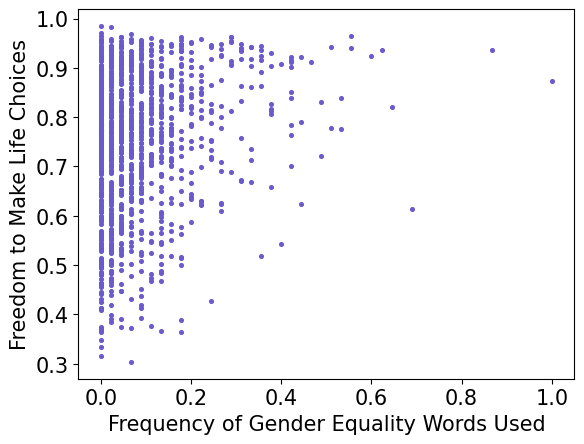

In [84]:
train_data.plot.scatter(x="Frequency", y="Freedom to make life choices", s=7, c='slateblue', marker='o')
# Adding title and labels
plt.xlabel('Frequency of Gender Equality Words Used', fontsize=15)
plt.ylabel('Freedom to Make Life Choices', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.savefig('freq_freedom.png')

In [26]:
import pandas as pd
from scipy.stats import spearmanr

a = final_df['Frequency']    # Extract the 'Frequency' column
b = final_df['Life Ladder']  # Extract the 'Life Ladder' column
c = final_df['Log GDP per capita']
d = final_df['Social support']
e = final_df['Freedom to make life choices']

# Now you can compute the Pearson correlation
r_value1, p_value1 = spearmanr(a, b)
r_value2, p_value2 = spearmanr(a, c)
r_value3, p_value3 = spearmanr(a, d)
r_value4, p_value4 = spearmanr(a, e)

print("For frequency vs life ladder:")
print(f'Spearman correlation coefficient: {r_value1}')
print(f'P-value: {p_value1}')

print("For frequency vs log GDP per capita:")
print(f'Spearman correlation coefficient: {r_value2}')
print(f'P-value: {p_value2}')

print("For frequency vs Social support:")
print(f'Spearman correlation coefficient: {r_value3}')
print(f'P-value: {p_value3}')

print("For frequency vs freedom to make life choices:")
print(f'Spearman correlation coefficient: {r_value4}')
print(f'P-value: {p_value4}')

For frequency vs life ladder:
Spearman correlation coefficient: 0.13666628365804487
P-value: 5.828723902536913e-10
For frequency vs log GDP per capita:
Spearman correlation coefficient: nan
P-value: nan
For frequency vs Social support:
Spearman correlation coefficient: nan
P-value: nan
For frequency vs freedom to make life choices:
Spearman correlation coefficient: 0.15973065231813377
P-value: 4.0732317882378793e-13


In [27]:
# split our data
X = train_data.drop(columns=['Country name', 'year', 'Trend'])

Y = train_data['Trend'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [28]:
# **MACHINE LEARNING MODEL**
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from time import time
import numpy as np

# Classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Ada Boost Classifier": AdaBoostClassifier(algorithm='SAMME', random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

# Parameter grids for each model
param_grids = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},  # Logistic Regression
    {'alpha': [0.0001, 0.001, 0.01], 'loss': ['hinge', 'log_loss']},  # SGD Classifier
    {'n_estimators': [50, 100, 200], 'learning_rate': [1.0, 0.5, 0.1]},  # AdaBoost
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},  # RandomForest
    {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}  # DecisionTree
]

def train_grid_search(models, param_grids):
    best_params = []
    best_models = []
    best_accuracy = []
    best_f1 = []
    best_precision = []
    best_recall = []
    
    for idx, model_name in enumerate(models.keys()):
        t1 = time()
        print("Model Name: ", model_name)
        print("Model: ", models[model_name])
        
        # Use GridSearchCV with the specific model and its param_grid
        cv = GridSearchCV(models[model_name], param_grids[idx], cv=StratifiedKFold(n_splits=5))
        
        # Fit the model using X_train and y_train directly
        cv.fit(X_train, y_train)
        
        # Get the best estimator and make predictions
        model = cv.best_estimator_
        y_pred = model.predict(X_test)
        
        # Calculate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        # Append results
        best_params.append(cv.best_params_)
        best_models.append(model)
        best_accuracy.append(accuracy)
        best_f1.append(f1)
        best_precision.append(precision)
        best_recall.append(recall)
        
        # Timing and separation
        print("Time taken: ", time() - t1)
        print("----------------------------------")
    
    return {
        "model_names": list(models.keys()), 
        "best_params": best_params, 
        "best_models": best_models, 
        "best_accuracy": best_accuracy, 
        "best_f1": best_f1, 
        "best_precision": best_precision, 
        "best_recall": best_recall
    }

# Run the grid search and get the results
results = train_grid_search(models, param_grids)

# Print results for the best model based on accuracy, F1 score, etc.
best_model_idx = np.argmax(results['best_accuracy'])
best_model = results['best_models'][best_model_idx]
print("Best Model Idx:", best_model_idx)
print("Best Model:", best_model)

print("Model accuracy:", results['best_accuracy'][best_model_idx])
print("Model F1 score:", results['best_f1'][best_model_idx])
print("Model precision:", results['best_precision'][best_model_idx])
print("Model recall:", results['best_recall'][best_model_idx])


Model Name:  Logistic Regression
Model:  LogisticRegression()
Time taken:  0.44071483612060547
----------------------------------
Model Name:  SGD Classifier
Model:  SGDClassifier(random_state=42)
Time taken:  0.32081174850463867
----------------------------------
Model Name:  Ada Boost Classifier
Model:  AdaBoostClassifier(algorithm='SAMME', random_state=42)
Time taken:  21.952441692352295
----------------------------------
Model Name:  Random Forest Classifier
Model:  RandomForestClassifier(random_state=42)
Time taken:  15.472588300704956
----------------------------------
Model Name:  Decision Tree Classifier
Model:  DecisionTreeClassifier(random_state=42)
Time taken:  0.6348679065704346
----------------------------------
Best Model Idx: 0
Best Model: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Model accuracy: 0.7409326424870466
Model F1 score: 0.6153846153846154
Model precision: 0.7272727272727273
Model recall: 0.5333333333333333


In [29]:
results['best_params']

[{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'},
 {'alpha': 0.001, 'loss': 'log_loss'},
 {'learning_rate': 1.0, 'n_estimators': 100},
 {'max_depth': 5, 'n_estimators': 100},
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}]

In [30]:
results['best_models'][best_model_idx]

LogisticRegression(C=10, penalty='l1', solver='liblinear')

AUC: 0.6130508474576272


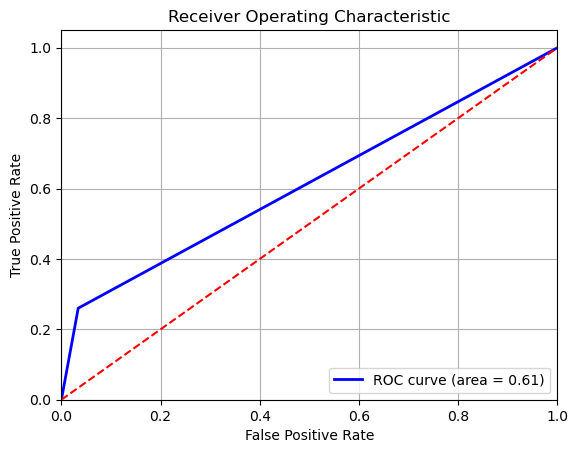

In [31]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

params = {'alpha': 0.0001, 'loss': 'hinge'}

# Initialize the SGDClassifier with unpacked parameters
sgd = SGDClassifier(random_state=42, **params)

# Fit the model
sgd.fit(X_train, y_train) 

# Make predictions
y_pred = sgd.predict(X_test)

# # Assuming `y_test` are the true labels and `y_scores` are the predicted probabilities
# y_test = [...]  # Replace with your actual test labels
# y_scores = lr.predict_proba(test_data.drop(columns=['Country name', 'year', 'Frequency_Difference']))[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the AUC
print(f"AUC: {roc_auc}")

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

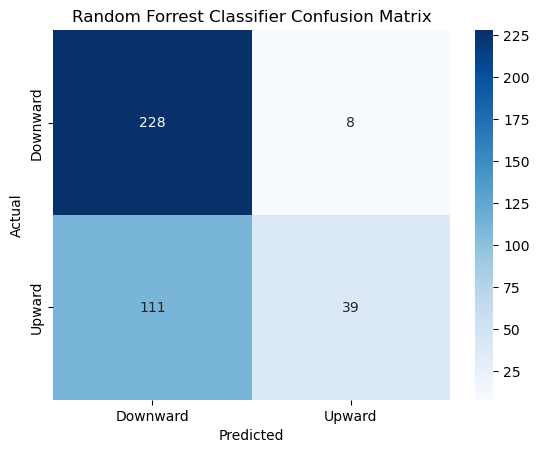

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly define params as a dictionary, not a tuple
params = {'alpha': 0.0001, 'loss': 'hinge'}

# Initialize the SGDClassifier with unpacked parameters
sgd = SGDClassifier(random_state=42, **params)

# Fit the model
sgd.fit(X_train, y_train) 

# Make predictions
results = sgd.predict(test_data.drop(columns = ['Country name', 'year', 'Trend']))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Downward', 'Upward'], yticklabels=['Downward', 'Upward'])
plt.title("Random Forrest Classifier Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
# we get similar scores between linear regression and random forest, both of these models have quite a small R-squared value
# Both of the models predict only 5% of the variance which could indicate that freq isn't a strong predictor for Life Ladder.